In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Pre-processing and encoding data

## Importing

In [2]:
initial_dataset = pd.read_csv('initial_packets_dataset.csv')

In [3]:
initial_dataset = initial_dataset.drop(columns=["Unnamed: 0"])

In [4]:
initial_dataset

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted
0,104.31.70.141,193.231.20.40,HTTP,80.0,35764.0,0x011,NaN,1
1,174.138.30.236,193.231.20.40,TCP,60484.0,80.0,0x011,NaN,1
2,78.96.80.4,193.231.20.40,HTTP,57852.0,80.0,0x018,NaN,1
3,207.46.13.129,193.231.20.40,TCP,14217.0,80.0,0x0c2,NaN,1
4,27.19.170.131,193.231.20.40,TCP,60171.0,80.0,0x011,NaN,1
5,94.176.146.172,193.231.20.40,TLSv1.2,50335.0,443.0,0x018,Application Data,1
6,213.233.84.17,193.231.20.40,TCP,13159.0,443.0,0x010,NaN,1
7,81.89.14.113,193.231.20.40,TCP,47880.0,80.0,0x011,NaN,1
8,86.34.180.6,193.231.20.40,TCP,58681.0,80.0,0x010,NaN,1
9,213.233.84.61,193.231.20.40,TLSv1.2,3130.0,443.0,0x018,"Change Cipher Spec,Handshake",0


## Removing the destination IP

The destination IP should be the same (since it's the traffic recorded specifically for a webserver. Let's see if there is data that leaked.

In [5]:
initial_dataset[initial_dataset.Destination != '193.231.20.40']

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted
2898,193.231.20.40,210.245.8.110,ICMP,49916.0,80.0,0x002,NaN,0
4701,193.231.20.40,202.51.74.92,ICMP,53948.0,80.0,0x002,NaN,0
5213,193.231.20.40,62.210.214.118,ICMP,52691.0,80.0,0x002,NaN,0
5267,193.231.20.40,94.102.49.190,ICMP,4500.0,4500.0,NaN,NaN,0
9573,193.231.20.40,193.201.224.220,ICMP,49896.0,80.0,0x0c2,NaN,0
11512,193.231.20.40,196.52.43.63,ICMP,56863.0,1900.0,NaN,NaN,0
22856,193.231.20.40,193.201.224.220,ICMP,60256.0,80.0,0x002,NaN,0
25307,193.231.20.40,122.228.19.79,ICMP,43569.0,5632.0,NaN,NaN,0
28989,193.231.20.40,202.51.74.92,ICMP,54770.0,80.0,0x002,NaN,0
33847,193.231.20.40,62.210.214.118,ICMP,41717.0,80.0,0x002,NaN,0


There is. We should remove this.

In [6]:
initial_dataset.drop(initial_dataset[initial_dataset.Destination != '193.231.20.40'].index, inplace=True)

In [7]:
initial_dataset[initial_dataset.Destination != '193.231.20.40']

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted


**We will make a function that returns X and y, so we will drop the destination IP there.**

## Filling NaN values for Content Type

In [8]:
initial_dataset["Content Type"].fillna(value="Not TLS", inplace=True)

In [9]:
initial_dataset

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted
0,104.31.70.141,193.231.20.40,HTTP,80.0,35764.0,0x011,Not TLS,1
1,174.138.30.236,193.231.20.40,TCP,60484.0,80.0,0x011,Not TLS,1
2,78.96.80.4,193.231.20.40,HTTP,57852.0,80.0,0x018,Not TLS,1
3,207.46.13.129,193.231.20.40,TCP,14217.0,80.0,0x0c2,Not TLS,1
4,27.19.170.131,193.231.20.40,TCP,60171.0,80.0,0x011,Not TLS,1
5,94.176.146.172,193.231.20.40,TLSv1.2,50335.0,443.0,0x018,Application Data,1
6,213.233.84.17,193.231.20.40,TCP,13159.0,443.0,0x010,Not TLS,1
7,81.89.14.113,193.231.20.40,TCP,47880.0,80.0,0x011,Not TLS,1
8,86.34.180.6,193.231.20.40,TCP,58681.0,80.0,0x010,Not TLS,1
9,213.233.84.61,193.231.20.40,TLSv1.2,3130.0,443.0,0x018,"Change Cipher Spec,Handshake",0


Over-sampling using: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

## Filling NaN values for other columns

In [10]:
null_columns=initial_dataset.columns[initial_dataset.isnull().any()]
initial_dataset[null_columns].isnull().sum()

Source Port          79
Destination Port     79
Flags               350
dtype: int64

Since we need the source and destination port, these rows should be dropped.

In [11]:
initial_dataset.count()

Source              574853
Destination         574853
Protocol            574853
Source Port         574774
Destination Port    574774
Flags               574503
Content Type        574853
Accepted            574853
dtype: int64

In [12]:
initial_dataset.dropna(axis=0, inplace=True)

## Imputing

In [13]:
count_accepted, count_rejected = initial_dataset.Accepted.value_counts()

In [14]:
count_accepted, count_rejected

(418382, 156121)

In [15]:
df_rejected = initial_dataset[initial_dataset["Accepted"]==0]
df_accepted = initial_dataset[initial_dataset["Accepted"]==1]

Random over-sampling:
1    418382
0    418382
Name: Accepted, dtype: int64


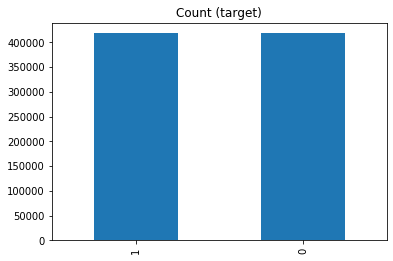

In [16]:
df_rejected_over = df_rejected.sample(count_accepted, replace=True)
df_oversampled = pd.concat([df_accepted, df_rejected_over], axis=0)

print('Random over-sampling:')
print(df_oversampled.Accepted.value_counts())

df_oversampled.Accepted.value_counts().plot(kind='bar', title='Count (target)');

In [17]:
df_oversampled

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted
0,104.31.70.141,193.231.20.40,HTTP,80.0,35764.0,0x011,Not TLS,1
1,174.138.30.236,193.231.20.40,TCP,60484.0,80.0,0x011,Not TLS,1
2,78.96.80.4,193.231.20.40,HTTP,57852.0,80.0,0x018,Not TLS,1
3,207.46.13.129,193.231.20.40,TCP,14217.0,80.0,0x0c2,Not TLS,1
4,27.19.170.131,193.231.20.40,TCP,60171.0,80.0,0x011,Not TLS,1
5,94.176.146.172,193.231.20.40,TLSv1.2,50335.0,443.0,0x018,Application Data,1
6,213.233.84.17,193.231.20.40,TCP,13159.0,443.0,0x010,Not TLS,1
7,81.89.14.113,193.231.20.40,TCP,47880.0,80.0,0x011,Not TLS,1
8,86.34.180.6,193.231.20.40,TCP,58681.0,80.0,0x010,Not TLS,1
11,94.53.190.126,193.231.20.40,TCP,49937.0,80.0,0x010,Not TLS,1


In [18]:
initial_dataset.columns[:-1]

Index(['Source', 'Destination', 'Protocol', 'Source Port', 'Destination Port',
       'Flags', 'Content Type'],
      dtype='object')

In [32]:
def _in(dataset):
    """Returns X"""
    return dataset.drop(columns=["Destination","Accepted"])

def _in_with_destination(dataset):
    """Returns X"""
    return dataset.drop(columns=["Accepted"])

def _out(dataset):
    """Returns y"""
    return dataset["Accepted"]

In [20]:
_out(initial_dataset)

0         1
1         1
2         1
3         1
4         1
         ..
574987    0
574988    1
574989    1
574990    1
574991    1
Name: Accepted, Length: 574503, dtype: int64

Let's use `RandomOverSampler` to make this easier

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

Using TensorFlow backend.
c:\users\mihne\desktop\nn-firewall\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\mihne\desktop\nn-firewall\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\mihne\desktop\nn-firewall\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\mihne\desktop\nn-firewall\

In [41]:
X_resampled, y_resampled = ros.fit_resample(_in_with_destination(initial_dataset), _out(initial_dataset))

In [42]:
X_resampled[:,:]

array([['104.31.70.141', '193.231.20.40', 'HTTP', ..., 35764.0, '0x011',
        'Not TLS'],
       ['174.138.30.236', '193.231.20.40', 'TCP', ..., 80.0, '0x011',
        'Not TLS'],
       ['78.96.80.4', '193.231.20.40', 'HTTP', ..., 80.0, '0x018',
        'Not TLS'],
       ...,
       ['193.169.252.27', '193.231.20.40', 'TCP', ..., 80.0, '0x0c2',
        'Not TLS'],
       ['88.111.31.67', '193.231.20.40', 'TCP', ..., 80.0, '0x002',
        'Not TLS'],
       ['148.70.231.231', '193.231.20.40', 'HTTP/XML', ..., 80.0,
        '0x018', 'Not TLS']], dtype=object)

In [43]:
X_resampled[1]

array(['174.138.30.236', '193.231.20.40', 'TCP', 60484.0, 80.0, '0x011',
       'Not TLS'], dtype=object)

In [44]:
X_resampled_df = pd.DataFrame(data=X_resampled, columns=initial_dataset.columns[:-1])  

In [45]:
y_resampled_df = pd.DataFrame(data=y_resampled, columns=['Accepted'])

In [46]:
y_resampled_df

,Accepted
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [47]:
dataset_resampled = pd.concat([X_resampled_df,y_resampled_df], axis=1)

In [48]:
dataset_resampled

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted
0,104.31.70.141,193.231.20.40,HTTP,80,35764,0x011,Not TLS,1
1,174.138.30.236,193.231.20.40,TCP,60484,80,0x011,Not TLS,1
2,78.96.80.4,193.231.20.40,HTTP,57852,80,0x018,Not TLS,1
3,207.46.13.129,193.231.20.40,TCP,14217,80,0x0c2,Not TLS,1
4,27.19.170.131,193.231.20.40,TCP,60171,80,0x011,Not TLS,1
5,94.176.146.172,193.231.20.40,TLSv1.2,50335,443,0x018,Application Data,1
6,213.233.84.17,193.231.20.40,TCP,13159,443,0x010,Not TLS,1
7,81.89.14.113,193.231.20.40,TCP,47880,80,0x011,Not TLS,1
8,86.34.180.6,193.231.20.40,TCP,58681,80,0x010,Not TLS,1
9,213.233.84.61,193.231.20.40,TLSv1.2,3130,443,0x018,"Change Cipher Spec,Handshake",0


Now the dataset has been resampled.

## Encoding IP Address

In [49]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

In [50]:
dataset_resampled_copy = dataset_resampled

In [51]:
_in(dataset_resampled_copy)[_in(dataset_resampled_copy).columns[0]]

0          104.31.70.141
1         174.138.30.236
2             78.96.80.4
3          207.46.13.129
4          27.19.170.131
               ...      
836759    93.122.248.189
836760     93.122.248.91
836761    193.169.252.27
836762      88.111.31.67
836763    148.70.231.231
Name: Source, Length: 836764, dtype: object

Removing the `.` from Source IP Addresses 

In [52]:
#dataset_resampled_copy['Source'] = dataset_resampled_copy.Source.str.replace('.' , '')

In [53]:
dataset_resampled_copy

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted
0,104.31.70.141,193.231.20.40,HTTP,80,35764,0x011,Not TLS,1
1,174.138.30.236,193.231.20.40,TCP,60484,80,0x011,Not TLS,1
2,78.96.80.4,193.231.20.40,HTTP,57852,80,0x018,Not TLS,1
3,207.46.13.129,193.231.20.40,TCP,14217,80,0x0c2,Not TLS,1
4,27.19.170.131,193.231.20.40,TCP,60171,80,0x011,Not TLS,1
5,94.176.146.172,193.231.20.40,TLSv1.2,50335,443,0x018,Application Data,1
6,213.233.84.17,193.231.20.40,TCP,13159,443,0x010,Not TLS,1
7,81.89.14.113,193.231.20.40,TCP,47880,80,0x011,Not TLS,1
8,86.34.180.6,193.231.20.40,TCP,58681,80,0x010,Not TLS,1
9,213.233.84.61,193.231.20.40,TLSv1.2,3130,443,0x018,"Change Cipher Spec,Handshake",0


In [54]:
dataset_resampled_copy.dtypes

Source              object
Destination         object
Protocol            object
Source Port         object
Destination Port    object
Flags               object
Content Type        object
Accepted             int64
dtype: object

In [55]:
#dataset_source_ips = dataset_resampled_copy.Source.apply(lambda x: pd.Series(list(x)))

In [59]:
dataset_resampled_copy

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted
0,104.31.70.141,193.231.20.40,HTTP,80,35764,0x011,Not TLS,1
1,174.138.30.236,193.231.20.40,TCP,60484,80,0x011,Not TLS,1
2,78.96.80.4,193.231.20.40,HTTP,57852,80,0x018,Not TLS,1
3,207.46.13.129,193.231.20.40,TCP,14217,80,0x0c2,Not TLS,1
4,27.19.170.131,193.231.20.40,TCP,60171,80,0x011,Not TLS,1
5,94.176.146.172,193.231.20.40,TLSv1.2,50335,443,0x018,Application Data,1
6,213.233.84.17,193.231.20.40,TCP,13159,443,0x010,Not TLS,1
7,81.89.14.113,193.231.20.40,TCP,47880,80,0x011,Not TLS,1
8,86.34.180.6,193.231.20.40,TCP,58681,80,0x010,Not TLS,1
9,213.233.84.61,193.231.20.40,TLSv1.2,3130,443,0x018,"Change Cipher Spec,Handshake",0


In [65]:
def transform_ip(ip):
    """
    If IPv4, equalizes each group and left zero pads to match IPv6 length
    If IPv6, converts all to lower case
    """
    IPV6_LENGTH = 39
    IPV4_GROUP_LENGTH = 3 # each group in IPv4 is of this length
    if len(ip) < IPV6_LENGTH:
        # IPv4 address
        groups = ip.split( "." )
        equalize_group_length = "".join( map( lambda group: group.zfill(3), groups ))
        left_pad_with_zeros = list( equalize_group_length )
#         .zfill( IPV6_LENGTH )
#         [str(item).zfill(6) 
        for item in left_pad_with_zeros: str(item).zfill(IPV6_LENGTH)
        return left_pad_with_zeros
    else:
        return list(ip.lower())

In [72]:
from sklearn.preprocessing import LabelEncoder
def one_hot_ip(df):
    """
    Converts the ipAddress column of pandas DataFrame df, to one-hot
    Also returns the encoder used
    """
    enc = LabelEncoder()
    ip_df = df.Source.apply( lambda ip: transform_ip(ip) ).apply( pd.Series ) # creates separate columns for each char in IP
    X_ip = enc.fit_transform( ip_df )
    return X_ip, enc

In [73]:
dataset_resampled_copy2 = dataset_resampled

In [74]:
dataset_resampled_copy2

,Source,Destination,Protocol,Source Port,Destination Port,Flags,Content Type,Accepted
0,104.31.70.141,193.231.20.40,HTTP,80,35764,0x011,Not TLS,1
1,174.138.30.236,193.231.20.40,TCP,60484,80,0x011,Not TLS,1
2,78.96.80.4,193.231.20.40,HTTP,57852,80,0x018,Not TLS,1
3,207.46.13.129,193.231.20.40,TCP,14217,80,0x0c2,Not TLS,1
4,27.19.170.131,193.231.20.40,TCP,60171,80,0x011,Not TLS,1
5,94.176.146.172,193.231.20.40,TLSv1.2,50335,443,0x018,Application Data,1
6,213.233.84.17,193.231.20.40,TCP,13159,443,0x010,Not TLS,1
7,81.89.14.113,193.231.20.40,TCP,47880,80,0x011,Not TLS,1
8,86.34.180.6,193.231.20.40,TCP,58681,80,0x010,Not TLS,1
9,213.233.84.61,193.231.20.40,TLSv1.2,3130,443,0x018,"Change Cipher Spec,Handshake",0


In [75]:
dataset_resampleddataset_resampled[dataset_resampled_copy2.columns[0]]

NameError: name 'dataset_resampleddataset_resampled' is not defined

In [76]:
ds_ip_encoded = one_hot_ip(dataset_resampled_copy2)

ValueError: bad input shape (836764, 12)